In [23]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Step 2: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [25]:

# Step 3: Load and Preprocess the Dataset
data_dir = '/content/drive/My Drive/Xalwa'
batch_size = 32
img_height = 180
img_width = 180

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)



Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [26]:
# Step 4: Define the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])



In [27]:
# Step 5: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [28]:
# Step 6: Train the Model
epochs = 100
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)



Epoch 1/100
5/5 [==============================] - 27s 5s/step - loss: 0.9050 - accuracy: 0.5125 - val_loss: 0.7073 - val_accuracy: 0.5000
Epoch 2/100
5/5 [==============================] - 20s 4s/step - loss: 0.7030 - accuracy: 0.4437 - val_loss: 0.6811 - val_accuracy: 0.6000
Epoch 3/100
5/5 [==============================] - 20s 4s/step - loss: 0.6697 - accuracy: 0.6250 - val_loss: 0.6398 - val_accuracy: 0.5500
Epoch 4/100
5/5 [==============================] - 21s 4s/step - loss: 0.6343 - accuracy: 0.6375 - val_loss: 0.5509 - val_accuracy: 0.8500
Epoch 5/100
5/5 [==============================] - 22s 4s/step - loss: 0.5761 - accuracy: 0.7875 - val_loss: 0.4211 - val_accuracy: 0.9750
Epoch 6/100
5/5 [==============================] - 19s 4s/step - loss: 0.4328 - accuracy: 0.8813 - val_loss: 0.2536 - val_accuracy: 1.0000
Epoch 7/100
5/5 [==============================] - 19s 4s/step - loss: 0.3516 - accuracy: 0.8500 - val_loss: 0.1793 - val_accuracy: 0.9750
Epoch 8/100
5/5 [==========

In [29]:
# Step 7: Evaluate the Model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy*100:.2f}%")



2/2 [==============================] - 3s 262ms/step - loss: 0.3938 - accuracy: 0.9250
Validation Accuracy: 92.50%


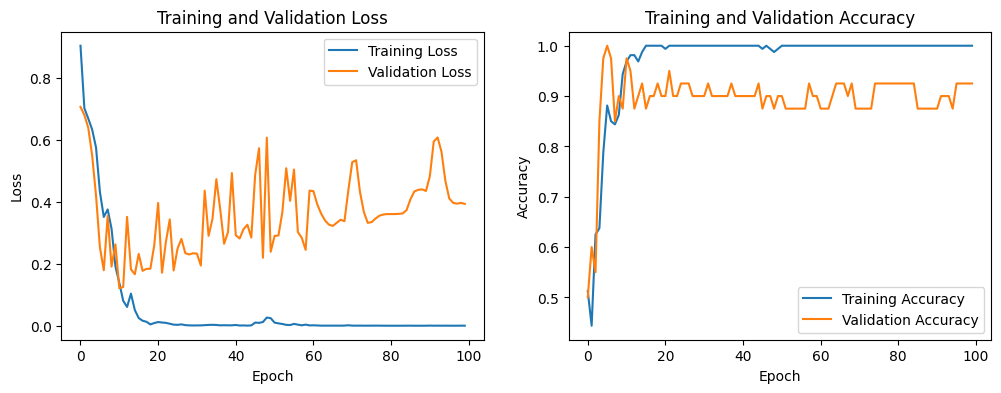

In [30]:
# Step 8: Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

In [31]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


2/2 [==============================] - 3s 121ms/step - loss: 0.3938 - accuracy: 0.9250
Validation Accuracy: 92.50%


In [32]:
# Generate predictions on the validation set
validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.round(predictions).astype(int)


2/2 [==============================] - 3s 120ms/step


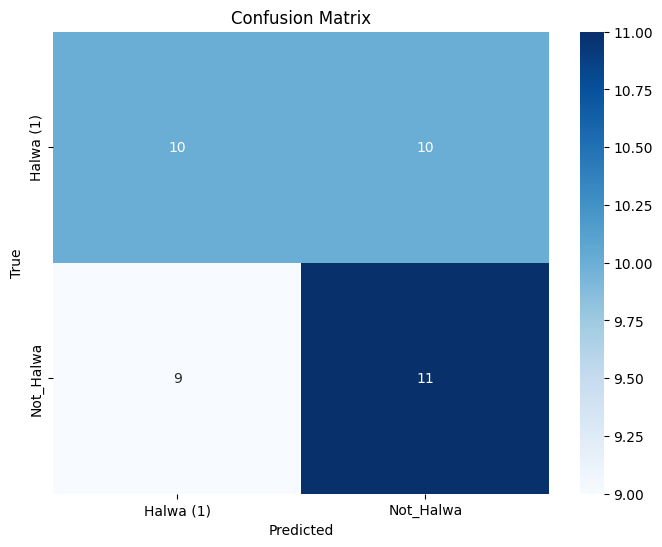

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the true labels from the validation generator
true_classes = validation_generator.classes

# Plot confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [34]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(true_classes, predicted_classes, target_names=validation_generator.class_indices.keys())
print(class_report)


              precision    recall  f1-score   support

   Halwa (1)       0.53      0.50      0.51        20
   Not_Halwa       0.52      0.55      0.54        20

    accuracy                           0.53        40
   macro avg       0.53      0.53      0.52        40
weighted avg       0.53      0.53      0.52        40



1/1 [==============================] - 1s 725ms/step


<ipython-input-35-451d57bf8e42>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label = class_names[int(preds[i])]   # Convert prediction to integer


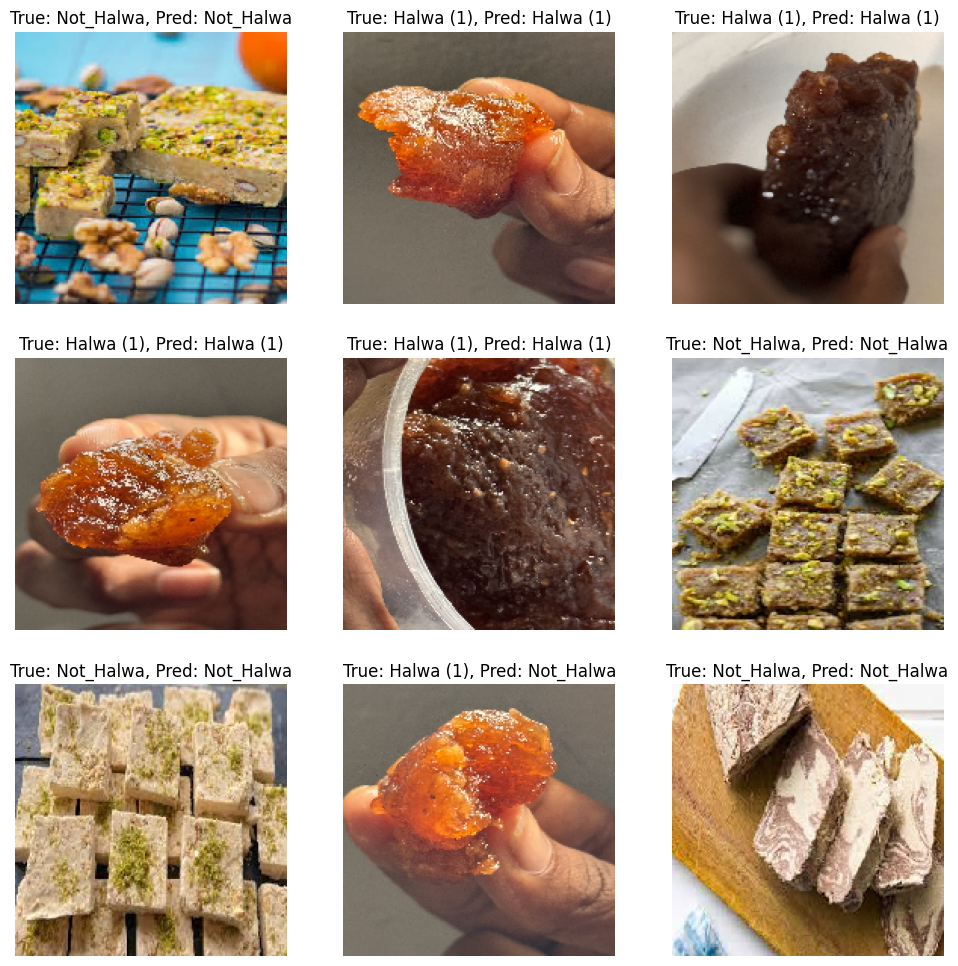

In [35]:
# Function to plot images with predictions
def plot_images(images, labels, preds, class_names):
    plt.figure(figsize=(12, 12))
    for i in range(min(len(images), 9)):  # Ensure we don't exceed the number of images
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        true_label = class_names[int(labels[i])]  # Convert label to integer
        pred_label = class_names[int(preds[i])]   # Convert prediction to integer
        plt.title(f"True: {true_label}, Pred: {pred_label}")
        plt.axis('off')
    plt.show()

# Get class names from the validation generator
class_names = list(validation_generator.class_indices.keys())

# Get a batch of images from the validation set
images, labels = next(validation_generator)
preds = model.predict(images)
preds_classes = np.round(preds).astype(int)

# Plot images with their true and predicted labels
plot_images(images, labels, preds_classes, class_names)


In [36]:
# Save the Model
model.save('/content/drive/My Drive/saved_model/halwa_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [46]:
# Load the saved model
model_path = '/content/drive/My Drive/saved_model/halwa_cnn_model.h5'
model = load_model(model_path)


In [52]:
# Define the test directory
test_dir = '/content/drive/My Drive/Xalwa/test'  # Adjust the path if needed

# Image parameters
batch_size = 32
img_height = 180
img_width = 180

# Create ImageDataGenerator for test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Create test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 100 images belonging to 2 classes.


In [53]:
# Generate Predictions on the Test Set
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.round(predictions).astype(int)


4/4 [==============================] - 3s 387ms/step


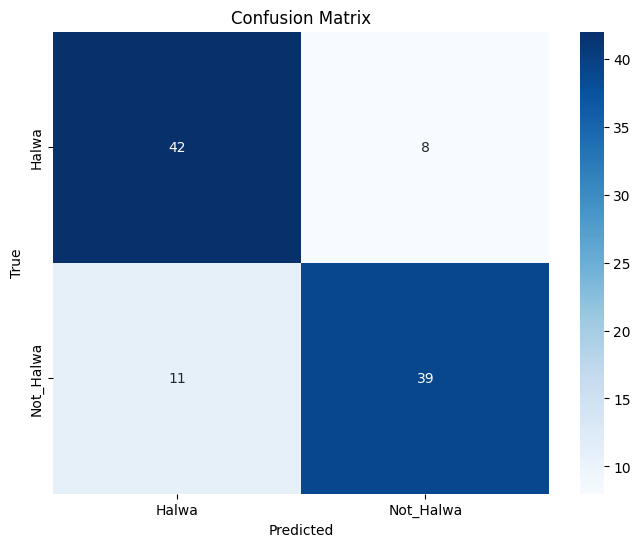

              precision    recall  f1-score   support

       Halwa       0.79      0.84      0.82        50
   Not_Halwa       0.83      0.78      0.80        50

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



In [54]:
# Confusion Matrix
true_classes = test_generator.classes
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(class_report)


1/1 [==============================] - 1s 549ms/step


<ipython-input-55-1788e1d50341>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label = class_names[int(preds[i])]   # Convert prediction to integer


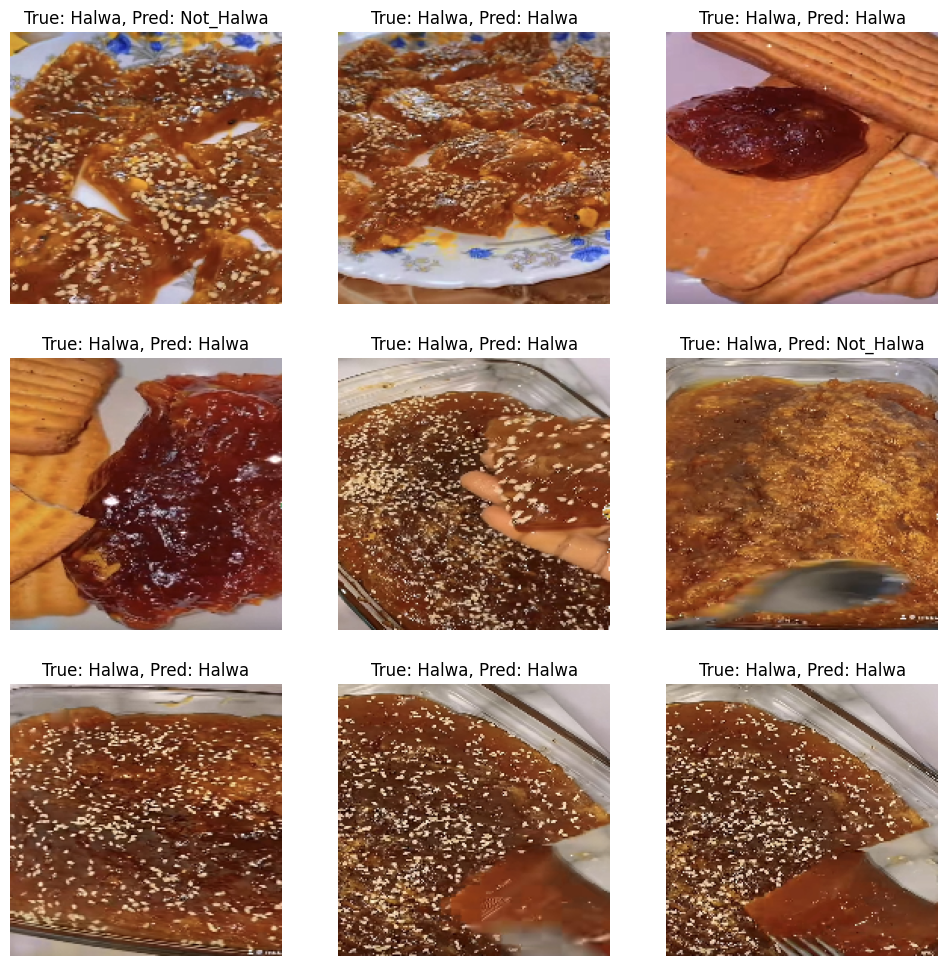

In [55]:
# Function to Plot Images with Predictions
def plot_images(images, labels, preds, class_names):
    plt.figure(figsize=(12, 12))
    for i in range(min(len(images), 9)):  # Ensure we don't exceed the number of images
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        true_label = class_names[int(labels[i])]  # Convert label to integer
        pred_label = class_names[int(preds[i])]   # Convert prediction to integer
        plt.title(f"True: {true_label}, Pred: {pred_label}")
        plt.axis('off')
    plt.show()

# Get class names from the test generator
class_names = list(test_generator.class_indices.keys())

# Get a batch of images from the test set
images, labels = next(test_generator)
preds = model.predict(images)
preds_classes = np.round(preds).astype(int)

# Plot images with their true and predicted labels
plot_images(images, labels, preds_classes, class_names)
